In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

The following is a proof of concept, that given an erg score for a 2k a reinforcement learning model or in this case a map can determine the best intensities for an athlete to train in.

In [30]:

LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 500
SHOW_EVERY = 50
#training proportions
intensities={'steady state':34,
             'Aerobic thershold':33,
             'Anaerobic':33}

ind={1:'steady state',
     2:'Aerobic thershold',
     3:'Anaerobic'}


###### Fake athlete scores

In [31]:
#480=8 mins
times = list()
for i in range(60):
    times.append(480-i)
for i in range(60,70):
    times.append(480-(i*2))
for i in range(70,80):
    times.append(480-(i*3))
for i in reversed(range(80,101)):
    times.append(480-i*1.5)

Below the graph shows that this temporary athlete times improve the most when the training is between 70%-80% of UT2.
This is to test to see if the agent is able to determine that this is the best percentage without been given this information

Text(0, 0.5, 'Time (secs)')

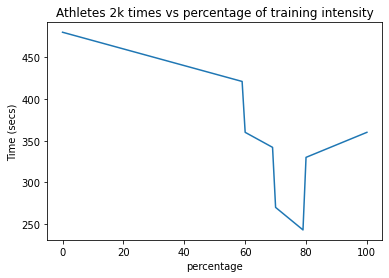

In [32]:
plt.plot(times)
plt.title("Athletes 2k times vs percentage of training intensity")
plt.xlabel('percentage')
plt.ylabel('Time (secs)')

##### function to get difference between times,
The divide by 100 is just experimentation as the code isn't perfect

In [33]:
def get_split_diff(state,new_state):
    diff=(times[new_state[1]]-times[state[1]])/100
    if diff >=0:
        diff = -1
    else:
        diff=-1*diff

    return diff
    

In [34]:
#This is a map of whether to increase,decrease or neither to the intensities.
q_table=np.random.uniform(low=-2, high=0, size=(101,101,101,8))

In [35]:
def do_action(state, actions,episode):
    div=len(intensities)-1
    action=actions//div
    subaction=(actions%div)+1
    new_state=list()
    
    if subaction>=action:
        subaction+=1
 
    #do nothing
    if action==0:
        if episode % SHOW_EVERY==0:
            print(f"Intensities are not changed, {intensities}")
            print(" ")
            
        reward=get_split_diff(state,state)
        return state, reward
   
    #Update system
    elif intensities[ind[action]]<100 and intensities[ind[subaction]]>0 :
        intensities[ind[action]]+=1
        intensities[ind[subaction]]-=1
        for i in range(len(intensities)):
            if i==(action-1):
                new_state.append(state[i]+1)
            elif i==(subaction-1):
                new_state.append(state[i]-1)
            else:
                new_state.append(state[i])
        
        if episode % SHOW_EVERY==0:
            print(f"{ind[action]} is increased, {ind[subaction]} is decreased")
            print(f"The intensities are {intensities}")
            print(" ")
            
        reward=get_split_diff(state,new_state)
        return tuple(new_state), reward  

In [36]:
#For loop
state=tuple([34,33,33])
for episode in range (EPISODES):
    if episode % SHOW_EVERY==0:
        print(f"Training week: {episode}")
        
    action=np.argmax(q_table[state])
    new_state, reward=do_action(state, action,episode)
    if reward >0:
        new_q=reward
    else:
        max_future_q = np.amax(q_table[new_state])
        current_q = q_table[state +(action, )]
        new_q = (1-LEARNING_RATE) * current_q + LEARNING_RATE + (reward + DISCOUNT * max_future_q)
    q_table[state+(action, )] = new_q
        
    state=new_state


Training week: 0
steady state is increased, Anaerobic is decreased
The intensities are {'steady state': 35, 'Aerobic thershold': 33, 'Anaerobic': 32}
 
Training week: 75
steady state is increased, Aerobic thershold is decreased
The intensities are {'steady state': 32, 'Aerobic thershold': 34, 'Anaerobic': 34}
 
Training week: 150
Intensities are not changed, {'steady state': 31, 'Aerobic thershold': 51, 'Anaerobic': 18}
 
Training week: 225
Anaerobic is increased, Aerobic thershold is decreased
The intensities are {'steady state': 19, 'Aerobic thershold': 65, 'Anaerobic': 16}
 
Training week: 300
Aerobic thershold is increased, steady state is decreased
The intensities are {'steady state': 14, 'Aerobic thershold': 77, 'Anaerobic': 9}
 
Training week: 375
Anaerobic is increased, steady state is decreased
The intensities are {'steady state': 7, 'Aerobic thershold': 82, 'Anaerobic': 11}
 
Training week: 450
Anaerobic is increased, Aerobic thershold is decreased
The intensities are {'stead